In [52]:
!pip install networkx matplotlib numpy --quiet

In [53]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### All Pairs Shortest Paths

In [54]:
G = nx.erdos_renyi_graph(5, 0.7, seed=0, directed=True)
for u, v in G.edges():
    G[u][v]['weight'] = np.random.randint(1, 10)

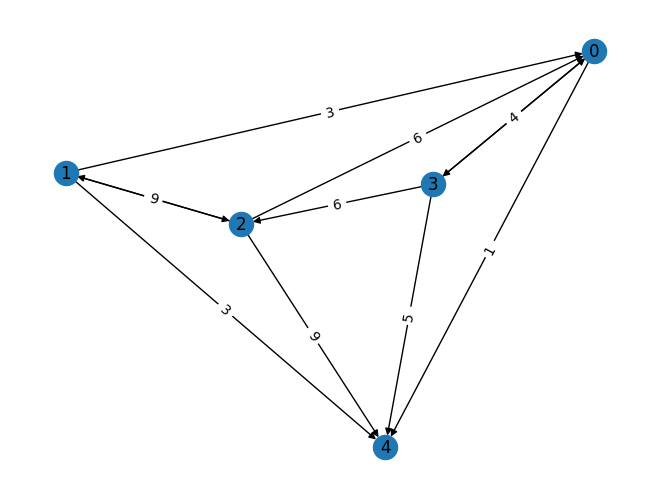

In [55]:
pos = nx.spring_layout(G, seed=1)
nx.draw(G, pos, with_labels=True)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

In [56]:
def all_pairs_shortest_paths(G):
    n = G.number_of_nodes()
    dist = {}
    for u in G.nodes():
        for v in G.nodes():
            dist[(u, v, 0)] = float('inf')
    for u, v in G.edges():
        dist[(u, v, 0)] = G[u][v]['weight']
    for k in range(1, n):
        for u in G.nodes():
            for v in G.nodes():
                dist[(u, v, k)] = min(dist[(u, v, k-1)], dist[(u, k, k-1)] + dist[(k, v, k-1)])
    return dist

In [57]:
k = 2
shortest_paths = all_pairs_shortest_paths(G)
for u in G.nodes():
    for v in G.nodes():
        print(f"Dist from {u} to {v} using only nodes 1 thru {k} is {shortest_paths[(u, v, k)]}")

Dist from 0 to 0 using only nodes 1 thru 2 is inf
Dist from 0 to 1 using only nodes 1 thru 2 is inf
Dist from 0 to 2 using only nodes 1 thru 2 is inf
Dist from 0 to 3 using only nodes 1 thru 2 is 2
Dist from 0 to 4 using only nodes 1 thru 2 is 1
Dist from 1 to 0 using only nodes 1 thru 2 is 3
Dist from 1 to 1 using only nodes 1 thru 2 is 17
Dist from 1 to 2 using only nodes 1 thru 2 is 8
Dist from 1 to 3 using only nodes 1 thru 2 is inf
Dist from 1 to 4 using only nodes 1 thru 2 is 3
Dist from 2 to 0 using only nodes 1 thru 2 is 6
Dist from 2 to 1 using only nodes 1 thru 2 is 9
Dist from 2 to 2 using only nodes 1 thru 2 is 17
Dist from 2 to 3 using only nodes 1 thru 2 is inf
Dist from 2 to 4 using only nodes 1 thru 2 is 9
Dist from 3 to 0 using only nodes 1 thru 2 is 4
Dist from 3 to 1 using only nodes 1 thru 2 is 15
Dist from 3 to 2 using only nodes 1 thru 2 is 6
Dist from 3 to 3 using only nodes 1 thru 2 is inf
Dist from 3 to 4 using only nodes 1 thru 2 is 5
Dist from 4 to 0 using on

### Longest Increasing Subsequence

In [58]:
arr = [5, 2, 8, 6, 3, 6, 9, 7]

In [59]:
def longest_increasing_subsequence(arr):
    n = len(arr)
    dp = [1] * n
    for i in range(1, n):
        for j in range(i):
            if arr[i] > arr[j]:
                dp[i] = max(dp[i], dp[j] + 1)
    return max(dp)

In [60]:
lis = longest_increasing_subsequence(arr)
print(f"The length of the longest increasing subsequence is {lis}")

The length of the longest increasing subsequence is 4


### Knapsack

In [61]:
weights = [10, 20, 30, 50, 10]
values = [30, 20, 10, 60, 20]

#### With Repetition

In [62]:
def knapsack_repeat(weights, values, capacity):
    dp = [0] * (capacity + 1)
    for i in range(1, capacity + 1):
        for j in range(len(weights)):
            if weights[j] <= i:
                dp[i] = max(dp[i], dp[i - weights[j]] + values[j])
    return dp[capacity]

In [63]:
capacity = 50

best_repeat = knapsack_repeat(weights, values, capacity)
print(f"The best value for the knapsack problem with repetition and {capacity} capacity is {best_repeat}")

The best value for the knapsack problem with repetition and 50 capacity is 150


#### Without Repetition

In [64]:
def knapsack_no_repeat(weights, values, capacity):
    n = len(weights)
    dp = {}
    # base cases
    for i in range(n + 1):
        dp[(i, 0)] = 0
    for i in range(capacity + 1):
        dp[(0, i)] = 0
    for i in range(1, n + 1):
        for j in range(1, capacity + 1):
            if weights[i - 1] <= j: # only if the current item can fit
                dp[(i, j)] = max(dp[(i - 1, j)], dp[(i - 1, j - weights[i - 1])] + values[i - 1])
            else:
                dp[(i, j)] = dp[(i - 1, j)]
    return dp[(n, capacity)]

In [65]:
capacity = 50

best_no_repeat = knapsack_no_repeat(weights, values, capacity)
print(f"The best value for the knapsack problem with no repetition and {capacity} capacity is {best_no_repeat}")

The best value for the knapsack problem with no repetition and 50 capacity is 70
